In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Load image

In [2]:
def read_file(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    
    plt.imshow(img)
    plt.show()
    return img

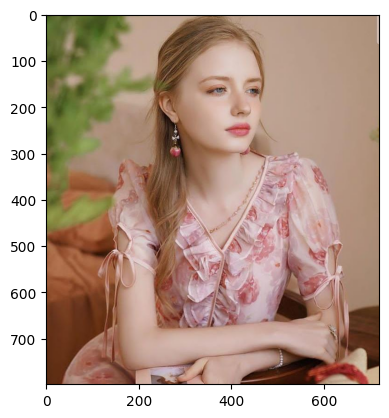

In [3]:
filename = "ik.jpg"
img= read_file(filename)
org_img = np.copy(img)


Create Edge Mask

In [4]:
def edge_mask(img, line_size, blur_value):
    '''
    input : input image
    output : edges of images
    '''
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_value)
    edges = cv2.adaptiveThreshold(gray_blur,255, cv2.ADAPTIVE_THRESH_MEAN_C,
    cv2.THRESH_BINARY,line_size,blur_value)
    return edges
    

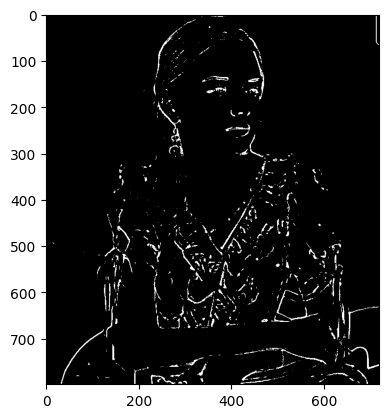

In [5]:
line_size,blur_value = 7, 7
edges = edge_mask(img, line_size, blur_value) #function call
plt.imshow(edges, cmap= "binary")
plt.show()

Reduce the Color Palette

In [6]:
def color_quantization(img, k):
    
    #transform the image
    data = np.float32(img).reshape((-1,3))
    
    #determine Criteria
    criteria = (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)
    
    #implementing k-Means
    ret, label, center = cv2.kmeans(data, k, None , criteria, 10,cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    result = center[label.flatten()]
    result = result.reshape(img.shape)
    return result

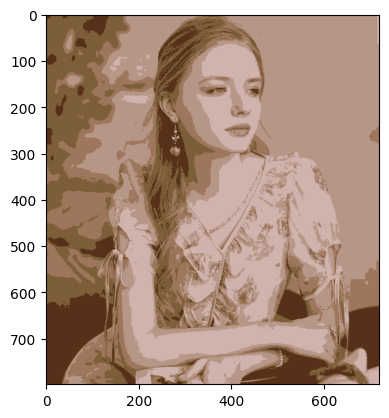

In [7]:
img = color_quantization(img, k=5)
plt.imshow(img)
plt.show()

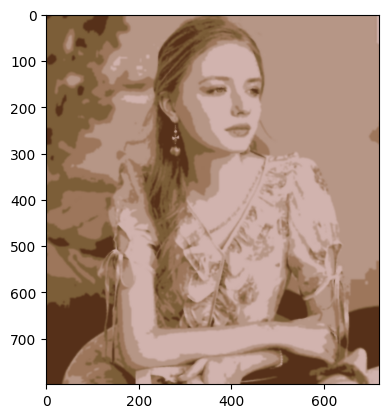

In [8]:
#reduce the noise 
blurred = cv2.bilateralFilter(img , d = 7, sigmaColor=200 , sigmaSpace=200) #d is diameter of each pixel neighborhood
plt.imshow(blurred)
plt.show()

Combine Edge mask with the quantiz img

In [9]:
def cartoon():
    c = cv2.bitwise_and(blurred,blurred, mask=edges) # merge the given two images ,(input1,input2,mask) are its parameters
    plt.imshow(c)
    plt.title("Cartoonified Image")
    plt.show() 
    #to show original image
    plt.imshow(org_img)
    plt.title("Original Image")
    plt.show()
    

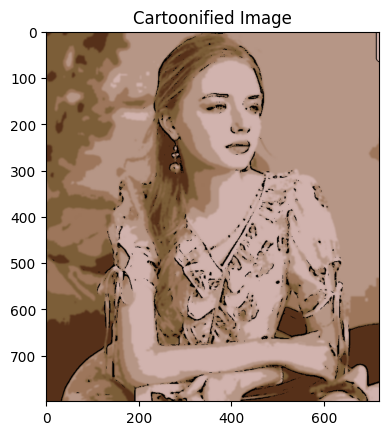

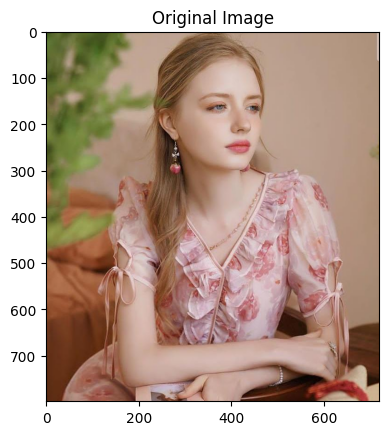

In [10]:
cartoon()